In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

In [24]:
print(df)

    ISO_Code               Country    Population  Blood_Group_O_Positive (%)  \
0        ALB               Albania  3.074579e+06                       34.10   
1        ARE  United Arab Emirates  9.992083e+06                       44.10   
2        ARG             Argentina  4.547912e+07                       50.34   
3        ARM               Armenia  3.021324e+06                       29.00   
4        AUS             Australia  2.546646e+07                       38.00   
..       ...                   ...           ...                         ...   
121      VNM               Vietnam  9.872128e+07                       41.70   
122      WRD                 World  7.772851e+09                       38.40   
123      YEM                 Yemen  2.988440e+07                       47.84   
124      ZAF          South Africa  5.646362e+07                       39.00   
125      ZWE              Zimbabwe  1.454631e+07                       36.40   

     Blood_Group_A_Positive(%)  Blood_G

In [32]:
df.columns

Index(['ISO_Code', 'Country', 'Population', 'Blood_Group_O_Positive (%)',
       'Blood_Group_A_Positive(%)', 'Blood_Group_B_Positive%',
       'Blood_Group_AB_Positive (%)', 'Blood_Group_O_Negative( %)',
       'Blood_Group_A_Negative( %)', 'Blood_Group_B_Negative (%)',
       'Blood_Group_AB_Negative (%)', 'Centroid_Lat', 'Centroid_Lon',
       'Area_sq_km', 'Pop_Density (per km²)', 'GDP_per_capita (USD)',
       'Median_Age', 'Literacy_Rate (%)', 'Healthcare_Index',
       'Urbanization(%) '],
      dtype='object')

In [47]:
import geopandas as gpd

# Load the world map data
world = gpd.read_file("C:\\Users\\user\\Downloads\\ne_110m_admin_0_tiny_countries.shp")

# Now you can check the columns
print(world.columns)


Index(['scalerank', 'featurecla', 'sr_label_i', 'sr_label_o', 'LABELRANK',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=171)


In [36]:
!pip install pycountry

In [49]:
print(world.columns)

Index(['scalerank', 'featurecla', 'sr_label_i', 'sr_label_o', 'LABELRANK',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=171)


In [51]:
print(world.head())  # Preview the first few rows

   scalerank              featurecla  sr_label_i  sr_label_o  LABELRANK  \
0          1  Admin-0 Tiny Countries           2           4          4   
1          1  Admin-0 Tiny Countries           2           6          6   
2          2  Admin-0 Tiny Countries           3           6          6   
3          2  Admin-0 Tiny Countries           3           6          4   
4          2  Admin-0 Tiny Countries           2           4          4   

       SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL               TYPE  ... FCLASS_TR  \
0         Vanuatu    VUT         0      2  Sovereign country  ...      None   
1          France    FR1         1      2         Dependency  ...      None   
2  United Kingdom    GB1         1      2         Dependency  ...      None   
3     New Zealand    NZ1         1      2         Dependency  ...      None   
4           Samoa    WSM         0      2  Sovereign country  ...      None   

  FCLASS_ID FCLASS_PL  FCLASS_GR FCLASS_IT FCLASS_NL  FCLASS_SE FCLASS_BD 

In [53]:
print(world[['FCLASS_UA', 'geometry']].head())  # Check country names instead

  FCLASS_UA                      geometry
0      None   POINT (166.92707 -15.36796)
1      None    POINT (69.22514 -49.33878)
2      None     POINT (-71.9539 21.91299)
3      None  POINT (-159.78923 -21.22009)
4      None  POINT (-172.41373 -13.63737)


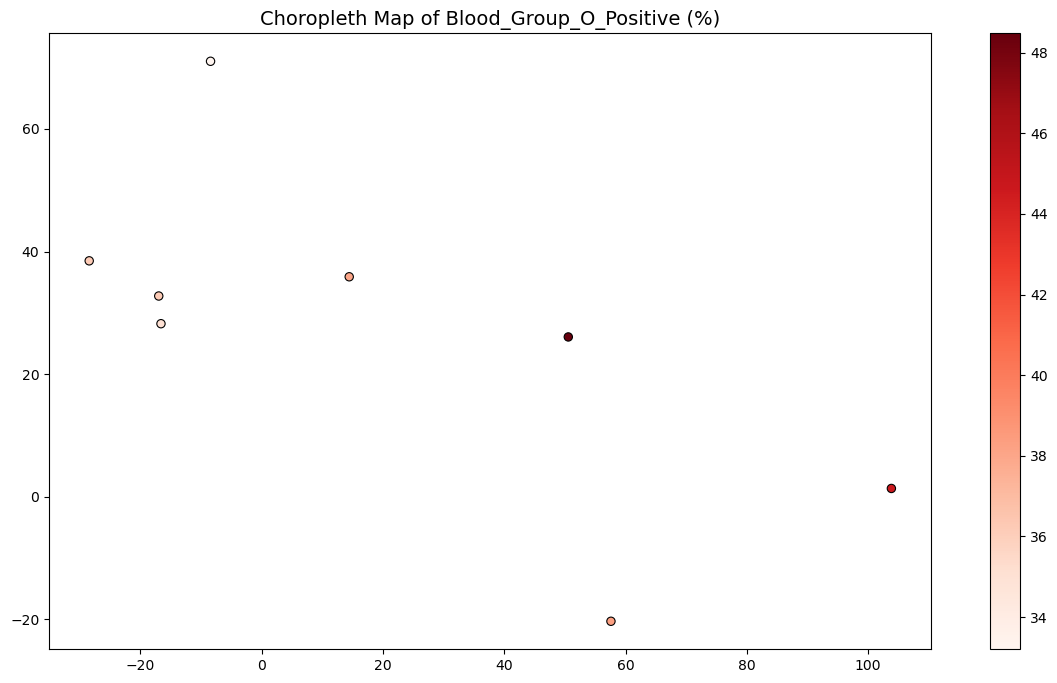

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map
world = gpd.read_file("C:\\Users\\user\\Downloads\\ne_110m_admin_0_tiny_countries.shp")

# Load your dataset
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1") # Ensure this contains 'ISO_Code' or 'Country'

# Merge dataset with world map using ISO_Code or Country Name
merged = world.merge(df, left_on="SOV_A3", right_on="ISO_Code", how="left")

# Select Blood Group to visualize
blood_group = "Blood_Group_O_Positive (%)"  

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
merged.plot(column=blood_group, cmap="Reds", linewidth=0.8, edgecolor='black',
            legend=True, ax=ax)

ax.set_title(f"Choropleth Map of {blood_group}", fontsize=14)
plt.show()

In [57]:
import geopandas as gpd
import folium
import pandas as pd
import matplotlib.pyplot as plt
import branca.colormap as cm

# Load world map
world = gpd.read_file("C:\\Users\\user\\Downloads\\ne_110m_admin_0_tiny_countries.shp")

# Load dataset
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

# Merge dataset with world map
merged = world.merge(df, left_on="SOV_A3", right_on="ISO_Code", how="left")

# Select blood group to visualize
blood_group = "Blood_Group_O_Positive (%)"

# Create map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Define color scale
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'], 
    vmin=merged[blood_group].min(), 
    vmax=merged[blood_group].max(),
    caption="O+ Blood Group Distribution (%)"
)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged,
    name="Choropleth",
    data=merged,
    columns=["SOV_A3", blood_group],
    key_on="feature.properties.SOV_A3",
    fill_color="YlGnBu",  # Try 'coolwarm', 'plasma'
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="O+ Blood Group (%)",
).add_to(m)

# Add color legend
colormap.add_to(m)

# Show map
m


In [59]:
import folium

# Define map center (latitude, longitude) and zoom level
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Display map
m


In [61]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


C:\Users\user\.local\share\cartopy


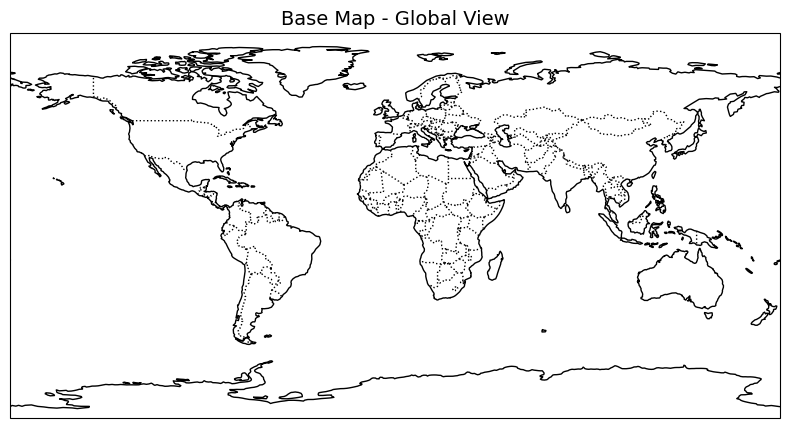

In [100]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure and set projection
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Add global coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set map limits
ax.set_global()

# Add title
ax.set_title("Base Map - Global View", fontsize=14)

print(cartopy.config['data_dir'])


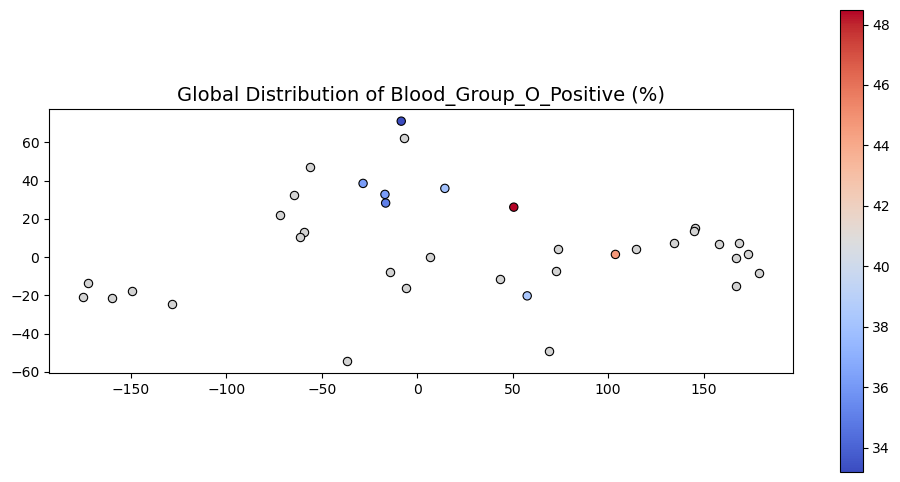

In [102]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load world map
world = gpd.read_file("C:\\Users\\user\\Downloads\\ne_110m_admin_0_tiny_countries.shp")

# Load your dataset (Ensure it has 'ISO_Code' or 'Country')
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

# Merge dataset with world map using ISO_Code
merged = world.merge(df, left_on="SOV_A3", right_on="ISO_Code", how="left")

# Select blood group to visualize
blood_group = "Blood_Group_O_Positive (%)"  # Change for other blood types

# Set up the figure and projection
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_title(f"Global Distribution of {blood_group}", fontsize=14)

# Plot the choropleth map
merged.plot(column=blood_group, cmap="coolwarm", linewidth=0.8, edgecolor="black",
            legend=True, ax=ax, missing_kwds={"color": "lightgrey", "label": "No data"})

plt.show()


In [69]:
from folium import GeoJsonTooltip


In [71]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [77]:
# Inspect the first feature in the GeoJSON data
print(merged.geometry.head())


0     POINT (166.92707 -15.36796)
1      POINT (69.22514 -49.33878)
2       POINT (-71.9539 21.91299)
3    POINT (-159.78923 -21.22009)
4    POINT (-172.41373 -13.63737)
Name: geometry, dtype: geometry


In [79]:
print(merged.iloc[0]['geometry'])  # Print properties of the first country


POINT (166.9270664395989 -15.367957152169708)


In [83]:
import geopandas as gpd
import folium
from folium import Choropleth

# Load world map
world = gpd.read_file("C:\\Users\\user\\Downloads\\ne_110m_admin_0_tiny_countries.shp")

# Assuming you've already merged your data into a GeoDataFrame called 'merged'
# If not, make sure to do that before this step

# Convert GeoDataFrame to GeoJSON format
geojson_data = merged.to_json()

# Now you can safely use it in Choropleth
m = folium.Map(location=[0, 0], zoom_start=2)

Choropleth(
    geo_data=geojson_data,
    data=merged,
    columns=["SOV_A3", "Blood_Group_O_Positive (%)"],  # Ensure these columns exist
    key_on="feature.properties.SOV_A3",  # Must match the GeoJSON structure
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Blood Group O+ (%)",
).add_to(m)

m.save("choropleth_map.html")

In [85]:
import geopandas as gpd
import folium
from folium import Choropleth
from folium.features import GeoJsonTooltip
import pandas as pd

# Check the column names in the merged DataFrame
print(merged.columns)

# Create a base map
m = folium.Map(location=[0, 0], zoom_start=2)

# First Choropleth Layer for Blood Group O+ (%) 
# Make sure the column names are correct after checking the column names in merged
choropleth_1 = Choropleth(
    geo_data=merged.to_json(),
    data=merged,
    columns=["SOV_A3", "Blood_Group_O_Positive (%)"],  # Adjust the column names as needed
    key_on="feature.properties.SOV_A3",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Blood Group O+ (%)",
).add_to(m)

# Add tooltips for Blood Group O+ (%) showing country, population, and blood group details
tooltip_1 = folium.GeoJsonTooltip(
    fields=["Country", "Literacy_Rate (%)", "GDP_per_capita (USD)"],
    aliases=["Country", "Literacy_Rate (%)", "GDP per Capita (USD)"],
    localize=True
)


# Add tooltip to choropleth_1
folium.GeoJson(
    merged.to_json(),
    tooltip=tooltip_1
).add_to(m)

# Second Choropleth Layer for Population Density
choropleth_2 = Choropleth(
    geo_data=merged.to_json(),
    data=merged,
    columns=["SOV_A3", "Pop_Density (per km²)"],  # Adjust column name for Population Density
    key_on="feature.properties.SOV_A3",
    fill_color="YlOrRd",  # Different color scale for Population Density
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Pop_Density (per km²)",
).add_to(m)

# Add tooltips for Population Density showing country, population, and density
tooltip_2 = folium.GeoJsonTooltip(
    fields=["Country", "Pop_Density (per km²)", "GDP_per_capita (USD)"],
    aliases=["Country", "Pop_Density (per km²)", "GDP per Capita (USD)"],
    localize=True
)


# Add tooltip to choropleth_2
folium.GeoJson(
    merged.to_json(),
    tooltip=tooltip_2
).add_to(m)

# Third Choropleth Layer for Healthcare Index
choropleth_3 = Choropleth(
    geo_data=merged.to_json(),
    data=merged,
    columns=["SOV_A3", "Healthcare_Index"],  # Adjust column name for Healthcare Index
    key_on="feature.properties.SOV_A3",
    fill_color="BuPu",  # Different color scale for Healthcare Index
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Healthcare Index",
).add_to(m)

# Add tooltips for Healthcare Index showing country, population, and healthcare index
tooltip_3 = folium.GeoJsonTooltip(
    fields=["Country", "Median_Age", "GDP_per_capita (USD)"],
    aliases=["Country", "Median_Age", "GDP per Capita (USD)"],
    localize=True
)



# Add tooltip to choropleth_3
folium.GeoJson(
    merged.to_json(),
    tooltip=tooltip_3
).add_to(m)

# Save the map to an HTML file
m.save("choropleth_map.html")

Index(['scalerank', 'featurecla', 'sr_label_i', 'sr_label_o', 'LABELRANK',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE',
       ...
       'Blood_Group_AB_Negative (%)', 'Centroid_Lat', 'Centroid_Lon',
       'Area_sq_km', 'Pop_Density (per km²)', 'GDP_per_capita (USD)',
       'Median_Age', 'Literacy_Rate (%)', 'Healthcare_Index',
       'Urbanization(%) '],
      dtype='object', length=191)


In [87]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Assuming 'merged' is your DataFrame containing the blood group data
blood_groups = [
    'Blood_Group_O_Positive (%)',
    'Blood_Group_A_Positive(%)',
    'Blood_Group_B_Positive%',
    'Blood_Group_AB_Positive (%)',
    'Blood_Group_O_Negative( %)',
    'Blood_Group_A_Negative( %)',
    'Blood_Group_B_Negative (%)',
    'Blood_Group_AB_Negative (%)'
]

# Convert blood group columns to numeric, coercing any errors to NaN
for blood_group in blood_groups:
    merged[blood_group] = pd.to_numeric(merged[blood_group], errors='coerce')

# Calculate the Z-scores for each blood group
for blood_group in blood_groups:
    merged[f'{blood_group}_Z'] = stats.zscore(merged[blood_group].dropna())  # Z-score for each region

# Identify the outliers (Z-score > 3 or Z-score < -3)
outliers = merged[merged[[f'{blood_group}_Z' for blood_group in blood_groups]].abs() > 3]

# Print the regions with outliers
print(outliers[['Country'] + [f'{blood_group}_Z' for blood_group in blood_groups]])

   Country  Blood_Group_O_Positive (%)_Z  Blood_Group_A_Positive(%)_Z  \
0      NaN                           NaN                          NaN   
1      NaN                           NaN                          NaN   
2      NaN                           NaN                          NaN   
3      NaN                           NaN                          NaN   
4      NaN                           NaN                          NaN   
5      NaN                           NaN                          NaN   
6      NaN                           NaN                          NaN   
7      NaN                           NaN                          NaN   
8      NaN                           NaN                          NaN   
9      NaN                           NaN                          NaN   
10     NaN                           NaN                          NaN   
11     NaN                           NaN                          NaN   
12     NaN                           NaN           

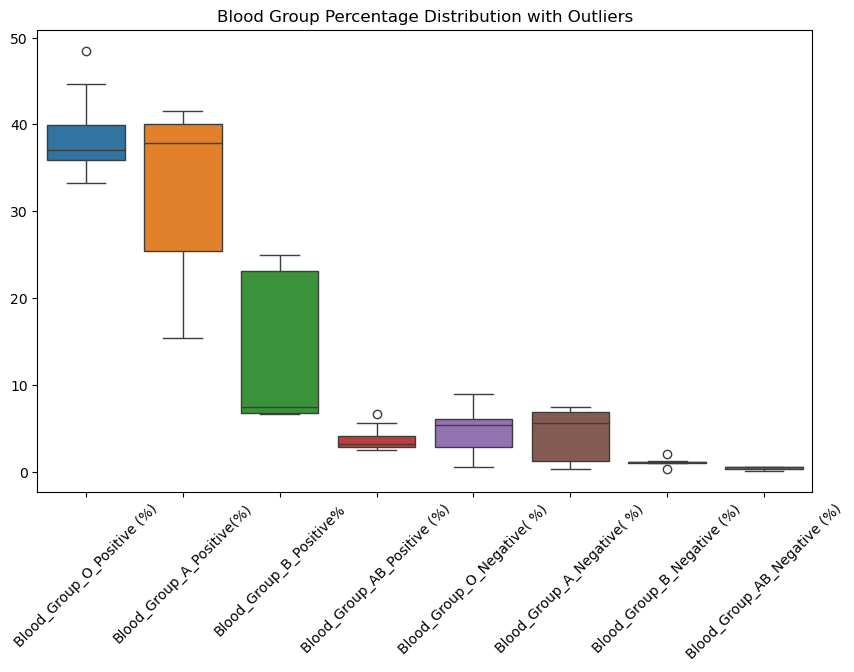

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each blood group percentage
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged[blood_groups])
plt.title("Blood Group Percentage Distribution with Outliers")
plt.xticks(rotation=45)
plt.show()

In [91]:
pip install pysal

Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install libpysal esda

Note: you may need to restart the kernel to use updated packages.


In [101]:
import geopandas as gpd

world = gpd.read_file("C:\\Users\\user\\Downloads\\ne_110m_admin_0_tiny_countries.shp")
print(world.columns)

Index(['scalerank', 'featurecla', 'sr_label_i', 'sr_label_o', 'LABELRANK',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=171)


Index(['scalerank', 'featurecla', 'sr_label_i', 'sr_label_o', 'LABELRANK',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=171)
Moran's I: 0.07115646258503404
p-value: 0.14


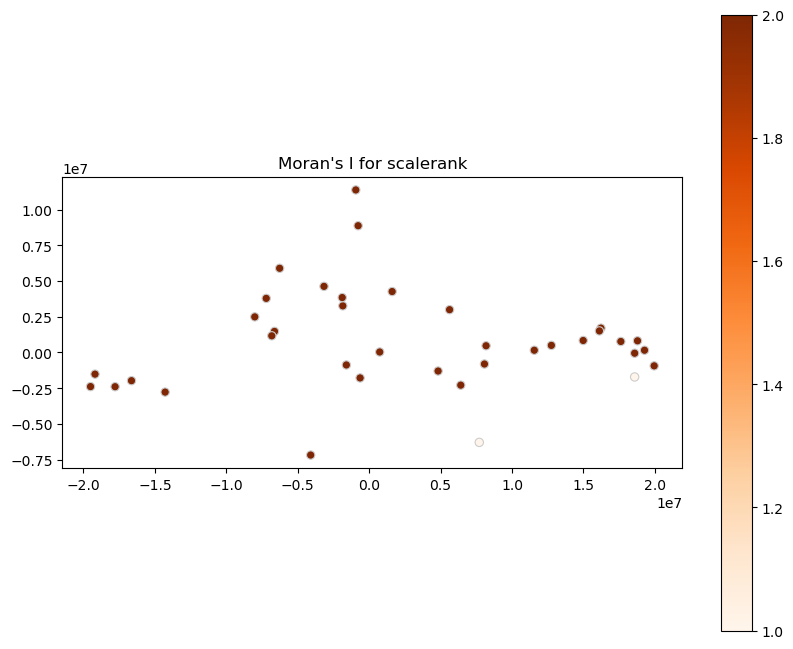

In [125]:
import geopandas as gpd
import libpysal
import esda
import numpy as np

# Load your geospatial data
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

# Ensure the data is projected (e.g., in meters or kilometers, not latitude/longitude)
gdf = gdf.to_crs(epsg=3395)

# Calculate spatial weights (e.g., using Queen contiguity or distance-based weights)
w = libpysal.weights.Queen.from_dataframe(gdf, use_index=False)

# Or use distance-based weights if that's preferred
# w = libpysal.weights.Distance.from_dataframe(gdf, threshold=100000)

# Strip whitespaces from column names
gdf.columns = gdf.columns.str.strip()

# Verify that the column exists
print(gdf.columns)

# Now proceed with the Moran's I calculation if the column exists
column_of_interest = "scalerank"  # Ensure this matches the exact column name
gdf[column_of_interest] = pd.to_numeric(gdf[column_of_interest], errors='coerce')

# Calculate Moran's I
y = gdf[column_of_interest]
mi = esda.Moran(y, w)

# Calculate Moran's I statistic
y = gdf[column_of_interest]
mi = esda.Moran(y, w)

# Output the result
print(f"Moran's I: {mi.I}")
print(f"p-value: {mi.p_sim}")

# You can also visualize the results
import matplotlib.pyplot as plt

# Plot the observed values and Moran's I
plt.figure(figsize=(10, 8))
gdf.plot(column=column_of_interest, legend=True, cmap='Oranges', linewidth=0.8, ax=plt.gca(), edgecolor='0.8')
plt.title(f'Moran\'s I for {column_of_interest}')
plt.show()

C:\Users\user\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


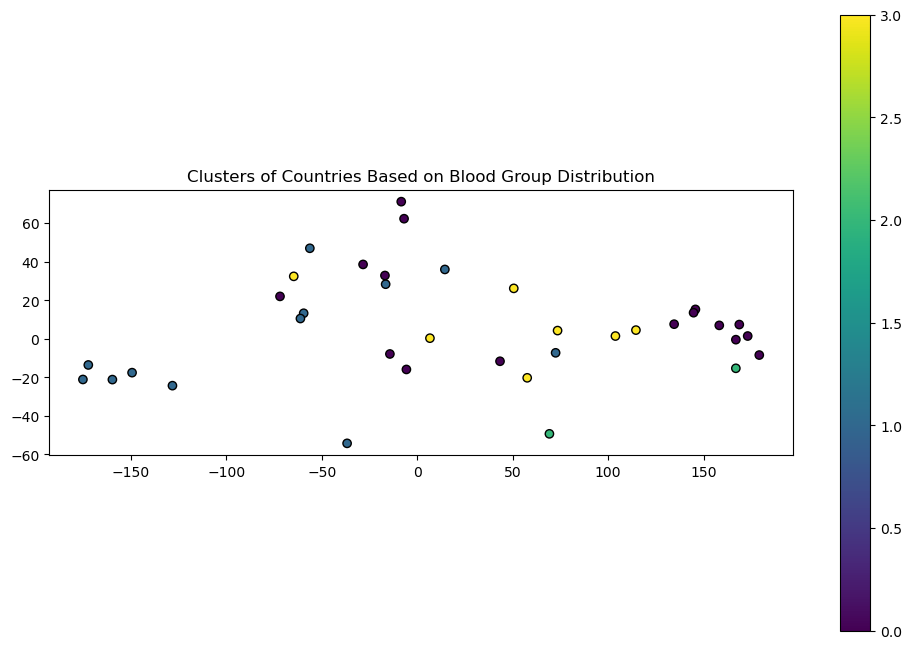

In [109]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load geospatial data
gdf = gpd.read_file("C:\\Users\\user\\Downloads\\ne_110m_admin_0_tiny_countries.shp")

# Select relevant numerical features
features = ["scalerank", "sr_label_o", "LABELRANK"]
gdf_filtered = gdf[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gdf_filtered)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
gdf.loc[gdf_filtered.index, "Cluster"] = kmeans.fit_predict(X_scaled)

# Plot clusters on the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column="Cluster", cmap="viridis", legend=True, edgecolor="black", ax=ax)
plt.title("Clusters of Countries Based on Blood Group Distribution")
plt.show()

In [111]:
pip install dash dash-bootstrap-components geopandas plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [119]:
import dash_core_components as dcc
import dash_html_components as html

In [121]:
from dash import dcc, html

In [149]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("Geospatial_dataset_PRJ.csv", encoding="latin1")

# Rename blood group columns for easier access
blood_group_columns = {
    "Blood_Group_O_Positive (%)": "O Positive",
    "Blood_Group_A_Positive(%)": "A Positive",
    "Blood_Group_B_Positive%": "B Positive",
    "Blood_Group_AB_Positive (%)": "AB Positive",
    "Blood_Group_O_Negative( %)": "O Negative",
    "Blood_Group_A_Negative( %)": "A Negative",
    "Blood_Group_B_Negative (%)": "B Negative",
    "Blood_Group_AB_Negative (%)": "AB Negative"
}

# Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("🌍 Global Blood Group & Public Health Dashboard"),
    
    html.Div([
        html.Label("Select Blood Group"),
        dcc.Dropdown(
            id="blood_group_dropdown",
            options=[{"label": v, "value": k} for k, v in blood_group_columns.items()],
            value="Blood_Group_B_Positive%",  # default value
        ),
        
        html.Br(),
        dcc.Checklist(
            id="layer_options",
            options=[
                {"label": "Show Borders", "value": "borders"},
                {"label": "Show Clusters", "value": "clusters"},
            ],
            value=[],
            labelStyle={'display': 'block'}
        )
    ], style={'width': '25%', 'float': 'left'}),
    
    html.Div([
        dcc.Graph(id="blood_group_map")
    ], style={'width': '70%', 'float': 'right'})
])

@app.callback(
    Output("blood_group_map", "figure"),
    Input("blood_group_dropdown", "value"),
    Input("layer_options", "value")
)
def update_map(blood_group_col, layer_options):
    try:
        fig = px.scatter_geo(
            df,
            lat="Centroid_Lat",
            lon="Centroid_Lon",
            color=blood_group_col,
            hover_name="Country",
            size=blood_group_col,
            projection="natural earth",
            template="plotly_white",
            title=f"Global Distribution of {blood_group_columns[blood_group_col]}"
        )

        if "borders" in layer_options:
            fig.update_geos(showcountries=True, countrycolor="Black")

        if "clusters" in layer_options:
            fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

        return fig

    except Exception as e:
        print(f"Error generating map: {e}")
        return px.scatter_geo()

if __name__ == "__main__":
    app.run_server(debug=True)
